In [1]:
from fastai.vision.all import *

# untar_data -> downloads files from URLs to dest.

In [29]:
#untar_data -> downloads files from URLs to dest.
path = untar_data(URLs.PETS)


In [33]:
#path.ls()

In [32]:
files = get_image_files(path/"images")
len(files)
#The Pet dataset contains 7,390 pictures of dogs and cats

7390

# Label Function

In [3]:
def is_cat(x): return x[0].isupper() #images with uppercase letter: cat images, rest dog images

# Image Data Loader

In [4]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat, #the function we just defined. 
    item_tfms=Resize(224))

#two kinds of transforms: item_tfms (each item is resized to a 224-pixel) 
#& batch_tfms (applied to a batch of items using GPU - fast)

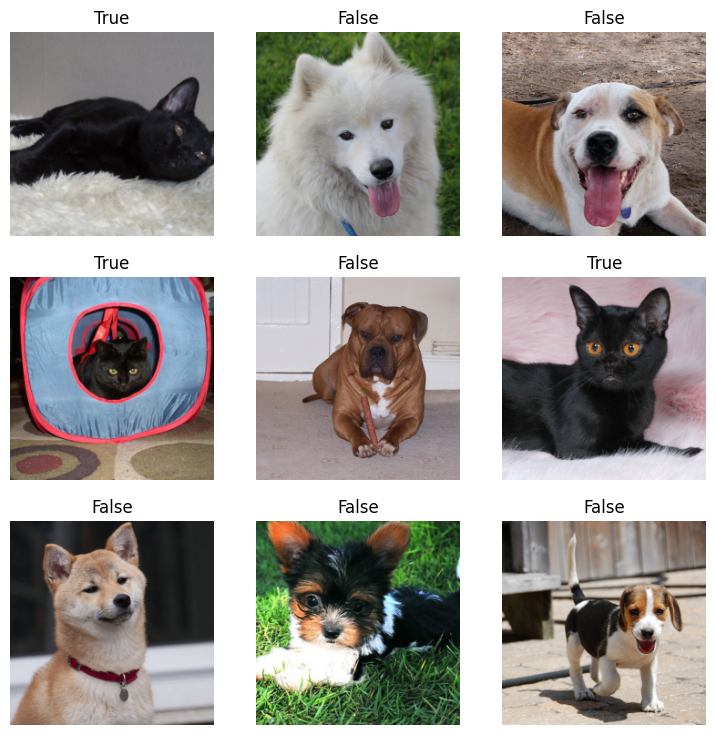

In [16]:
#Take a look at some sample data
dls.show_batch()

# Building the Model (convnet style learner)

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate) #cnn_learner -> renamed to 'vision_learner'
#use dls and arch=resnet34
#more on resnet34 (from torchvision: https://pytorch.org/vision/main/models/generated/torchvision.models.resnet34.html)
learn.fine_tune(1) 

epoch,train_loss,valid_loss,error_rate,time
0,0.152251,0.021636,0.007442,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.048347,0.020871,0.008119,01:12


# Prediction on a new image

In [34]:
learn.predict(files[0]) 
#Returns 1) decoded prediction, 2) index of predicted class, 
#3) tensor of probabilities of all classes in the order of indexed labels

('True', tensor(1), tensor([3.0936e-06, 1.0000e+00]))

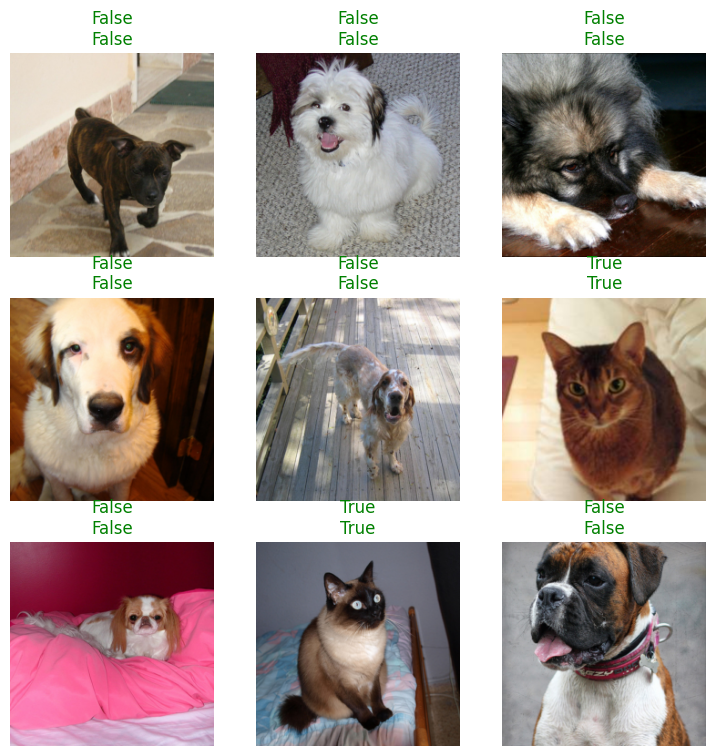

In [35]:
learn.show_results()

### more tutorial on this dataset: https://docs.fast.ai/tutorial.vision.html